# Introduction 
Customer churn, or the loss of customers to competitors or account closure, poses a significant challenge to the banking industry. In this project, we aim to address this critical concern by leveraging data-driven solutions. By analyzing historical customer data, including demographic information, transaction records, and customer interactions, we seek to develop a predictive model that can identify potential churners—customers at risk of leaving the bank. The objective is to empower the bank with a proactive tool that offers insights into customer behavior and predicts churn, enabling timely retention strategies and the preservation of customer relationships. Through this project, we endeavor to enhance customer satisfaction, minimize financial losses, and strengthen the bank's competitive position in the industry. The chosen algorithm for this predictive task is Logistic Regression, a robust and interpretable method for binary classification, which will enable us to make data-informed decisions regarding customer retention.  
## Impact of customer churn on businesses
A company with a high churn rate loses many subscribers, resulting in lower growth rates and a greater impact on sales and profits. Companies with low churn rates can retain customers.

#  Problem Statement
### The "Bank Customer Churn Out Prediction " project aims to address the challenge of customer churn within XYZ bank.  This project seeks to identify the factors and develop a predictive model to understand and forecast which bank customers are most likely to churn, with the ultimate goal of implementing strategies to retain those customers.

# Importing necessary libraries


In [1]:
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler,LabelEncoder


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, classification_report

# Data Collection 

For our Bank Customer Churn Prediction project, we obtained historical customer data from the bank's records. This comprehensive dataset encompasses essential information, including customer demographics, transaction history, and records of customer interactions. The data was provided in a structured format, conveniently stored in a single CSV (Comma-Separated Values) file. This organized data source serves as the foundation for our analysis, enabling us to delve into the details of customer behavior and build a predictive model to identify potential churners.( For this project Data source is Kaggle)

In [46]:
# Loading Data from Local system and converting it into dataframe
csv_file_path = "D:\Data Science\Projects\Bank Customer Churn Prediction.csv"
df = pd.read_csv(csv_file_path)

In [18]:
df.rename(columns={'Active_Member': 'Inactive_member'}, inplace=True)

# Exploratory Data Analysis
In the EDA phase, we meticulously examine the data, looking for outliers and missing values. Any missing data is carefully imputed using appropriate techniques to ensure data completeness. Additionally, some columns may require data cleaning to address missing or inconsistent values, further preparing the data for analysis. These crucial steps set the stage for building an accurate and robust predictive model to identify potential customer churn.

In [3]:
df.shape
# gives no. of rows, columns

(10000, 11)

In [4]:
df.nunique()

Customer_ID         10000
Credit_Score          460
Country                 3
Gender                  2
Age                    90
Tenure                 11
Balance              6382
Credit_Card             2
Active_Member           2
Estimated_salary     9999
Churn                   2
dtype: int64

as customer ID is specific to each one we will not need this attirbute so drop it.

In [67]:
df.drop(columns="Customer_ID",inplace=True)

In [6]:
df.head()
# know first five rows of data 

,Credit_Score,Country,Gender,Age,Tenure,Balance,Credit_Card,Active_Member,Estimated_salary,Churn
0,619.0,France,Female,42,2,0.00,Yes,Yes,101348.88,1
1,608.0,Spain,Female,41,1,83807.86,No,Yes,112542.58,0
2,502.0,France,Female,42,8,159660.80,Yes,No,113931.57,1
3,699.0,France,Female,102,1,0.00,No,No,93826.63,0
4,850.0,Spain,Female,43,2,125510.82,Yes,Yes,79084.10,0


In [140]:
df.info()
#for getting a quick overview of the DataFrame, displaying the data types, non-null counts, and memory usage.


<class 'pandas.core.frame.DataFrame'>
Int64Index: 9900 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Credit_Score      9900 non-null   float64
 1   Country           9900 non-null   int64  
 2   Gender            9900 non-null   int64  
 3   Age               9900 non-null   int64  
 4   Tenure            9900 non-null   int64  
 5   Balance           9900 non-null   float64
 6   Credit_Card       9900 non-null   int64  
 7   Active_Member     9900 non-null   int64  
 8   Estimated_salary  9900 non-null   float64
 9   Churn             9900 non-null   int64  
dtypes: float64(3), int64(7)
memory usage: 850.8 KB


In [139]:
df.describe()
#provides summary statistics for numerical columns,It helps in understanding the distribution of data and identifying potential outliers.


,Credit_Score,Country,Gender,Age,Tenure,Balance,Credit_Card,Active_Member,Estimated_salary,Churn
count,9900.000000,9900.000000,9900.000000,9900.000000,9900.000000,9900.000000,9900.000000,9900.000000,9900.000000,9900.000000
mean,650.479394,0.749091,0.545051,38.857576,5.014747,76546.213516,0.705859,0.507879,100169.651720,0.203535
std,96.708475,0.830202,0.497991,13.065592,2.893326,62416.952622,0.455679,0.499963,57503.871021,0.402648
min,350.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.580000,0.000000
25%,584.000000,0.000000,0.000000,32.000000,3.000000,0.000000,0.000000,0.000000,51136.837500,0.000000
50%,652.000000,0.000000,1.000000,37.000000,5.000000,97262.675000,1.000000,1.000000,100416.095000,0.000000
75%,718.000000,2.000000,1.000000,44.000000,8.000000,127685.682500,1.000000,1.000000,149428.260000,0.000000
max,850.000000,2.000000,1.000000,765.000000,10.000000,250898.090000,1.000000,1.000000,199992.480000,1.000000


In [136]:
df.sample(4)
#for randomly selecting rows from the DataFrame, making it useful for data sampling , checks for biasness of data  

,Credit_Score,Country,Gender,Age,Tenure,Balance,Credit_Card,Active_Member,Estimated_salary,Churn
630,589.0,0,0,61,1,0.00,1,1,61108.56,1
1017,778.0,2,1,41,7,139706.31,1,1,63337.19,0
8964,469.0,1,1,765,9,96776.49,1,1,119890.86,0
6884,639.0,0,1,35,8,0.00,1,0,170483.90,0


In [137]:
df.nunique()
#counts the number of unique values in each column,  help in understanding the diversity of data within each column.

Credit_Score         460
Country                3
Gender                 2
Age                   89
Tenure                11
Balance             6321
Credit_Card            2
Active_Member          2
Estimated_salary    9899
Churn                  2
dtype: int64

In [138]:
df.dtypes
#to check the data types of each column in the DataFrame, which is important for data preprocessing and ensuring that columns have the correct data types.

Credit_Score        float64
Country               int64
Gender                int64
Age                   int64
Tenure                int64
Balance             float64
Credit_Card           int64
Active_Member         int64
Estimated_salary    float64
Churn                 int64
dtype: object

# By using Graphical Presentation 

useful for understanding the underlying distribution of data  

visualize the distribution of a single variable.
 
Outliers often appear as isolated peaks or troughs in a KDE plot.

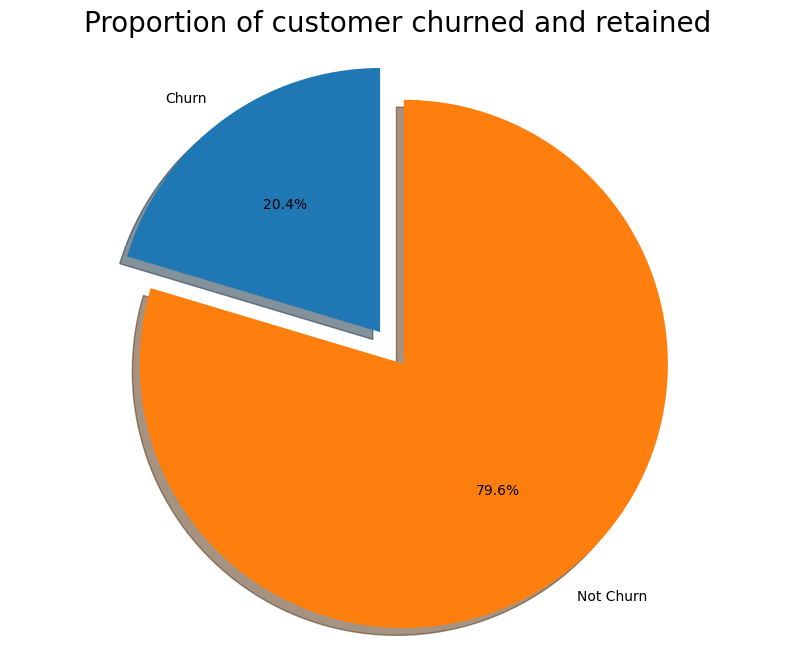

In [16]:
#  pie chart of churn col will provide an initial overview of the churn distribution
labels = 'Churn', 'Not Churn'
sizes = [df.Churn[df['Churn']==1].count(), df.Churn[df['Churn']==0].count()]
explode = (0, 0.15)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()

In [93]:
 #'relation  of target column with categorical variables

<Axes: xlabel='Inactive_member', ylabel='count'>

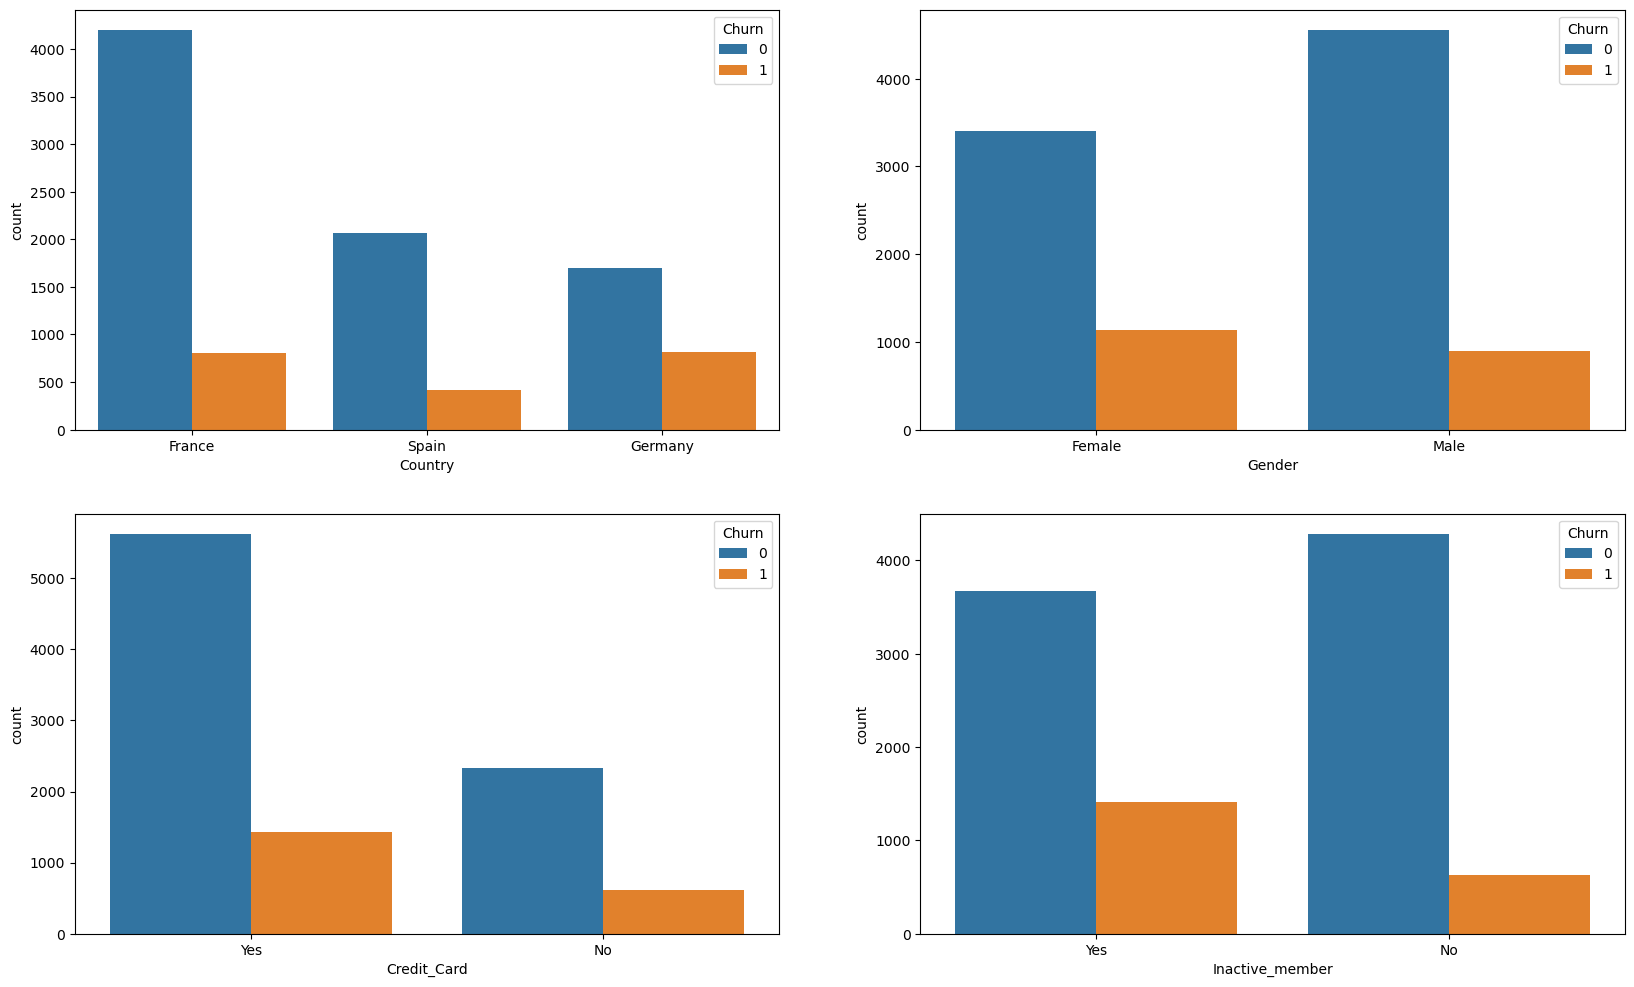

In [21]:
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(x='Country', hue = 'Churn',data = df, ax=axarr[0][0])
sns.countplot(x='Gender', hue = 'Churn',data = df, ax=axarr[0][1])
sns.countplot(x='Credit_Card', hue = 'Churn',data = df, ax=axarr[1][0])
sns.countplot(x='Inactive_member', hue = 'Churn',data = df, ax=axarr[1][1])

From aboe count plots we can note 

- France and Germany has high churn rate as compared to spain.  This may indicate potential issues in areas with fewer clients, such as inadequate customer service resources.

- Churn rates are higher among female customers compared to male customers, suggesting a gender-based difference in churn behavior.

- It's worth noting that most of the customers who churned have credit cards. However, this could be coincidental, as the majority of customers in the dataset also possess credit cards.

- Inactive members are more likely to churn. The dataset shows a substantial proportion of inactive members, indicating an opportunity for the bank to implement programs that can convert these customers into active members. 

<Axes: xlabel='Churn', ylabel='Estimated_salary'>

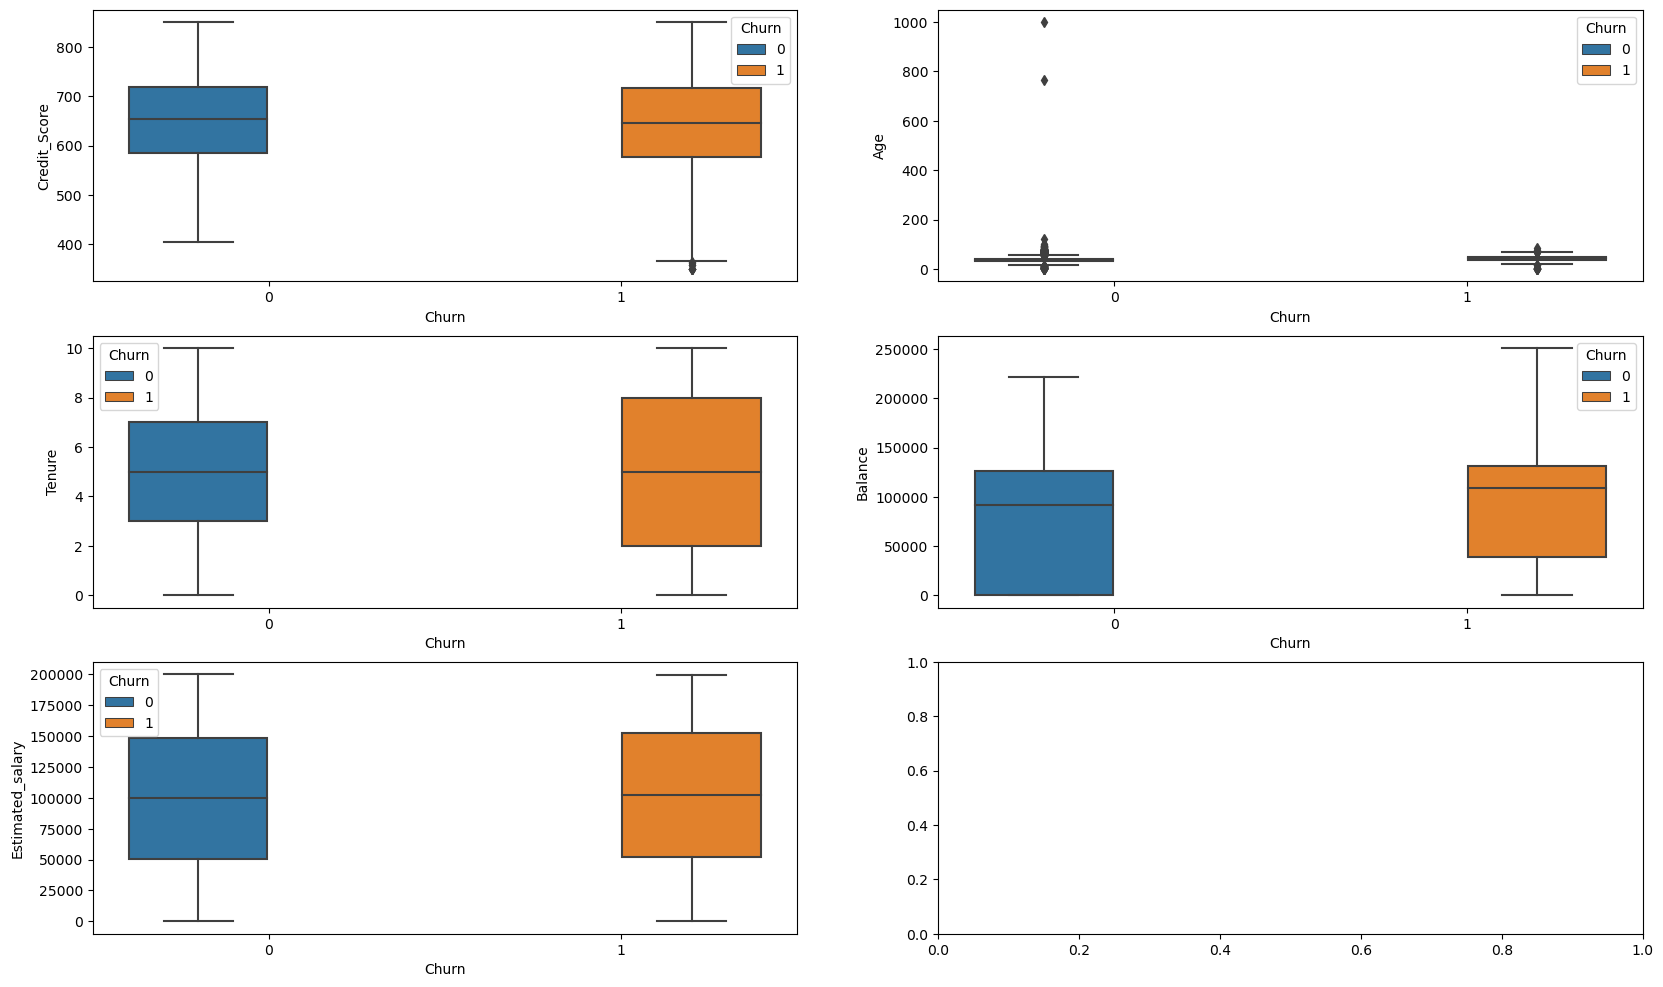

In [22]:
# lets see realtionship between continoues columns and target col 
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.boxplot(y='Credit_Score',x = 'Churn', hue = 'Churn',data = df, ax=axarr[0][0])
sns.boxplot(y='Age',x = 'Churn', hue = 'Churn',data = df , ax=axarr[0][1])
sns.boxplot(y='Tenure',x = 'Churn', hue = 'Churn',data = df, ax=axarr[1][0])
sns.boxplot(y='Balance',x = 'Churn', hue = 'Churn',data = df, ax=axarr[1][1])
sns.boxplot(y='Estimated_salary',x = 'Churn', hue = 'Churn',data = df, ax=axarr[2][0])

from above boxplot we can say
1. Credit scores don't significantly differ between retained and churned customers.
2. Churning is more common among older customers, suggesting differing service preferences among age groups.
3. Extreme tenure values (very short or very long) show higher churn rates compared to average tenures.
4. Churned customers tend to have significant bank balances, which could affect the bank's available capital for lending.

Now lets check the ditribution of data in each column by KDE graph 

Text(0.5, 1.0, 'KDE of Credit_Score')

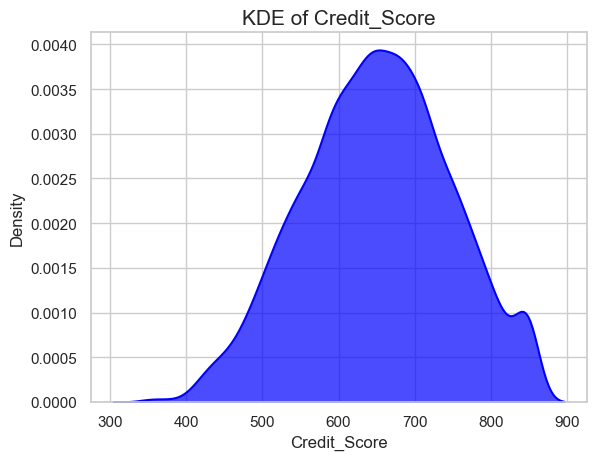

In [23]:
sns.set(style="whitegrid")
sns.kdeplot(data=df["Credit_Score"], fill=True, common_norm=False, alpha=0.7, linewidth=1.5,color="blue")

plt.title("KDE of Credit_Score",fontsize=15)

Text(0.5, 1.0, 'KDE of Age')

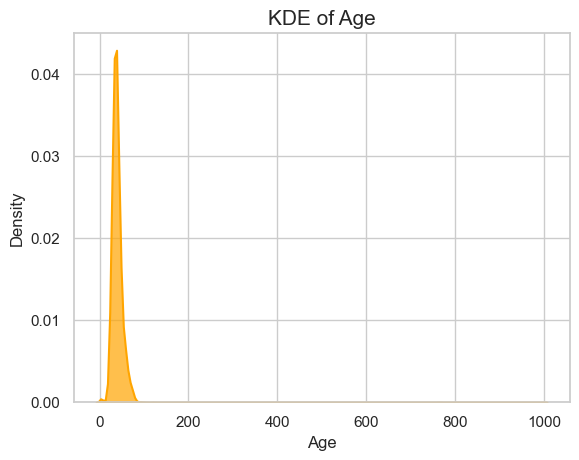

In [12]:
sns.set(style="whitegrid")
sns.kdeplot(data=df["Age"], fill=True, common_norm=False, alpha=0.7, linewidth=1.5, color="orange")

plt.title("KDE of Age", fontsize=15)


Text(0.5, 1.0, 'KDE of Estimated Salary')

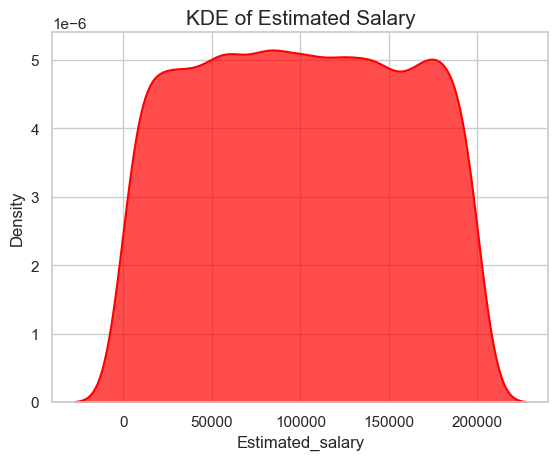

In [13]:
sns.set(style="whitegrid")
sns.kdeplot(data=df["Estimated_salary"], fill=True, common_norm=False, alpha=0.7, linewidth=1.5, color="red")

plt.title("KDE of Estimated Salary", fontsize=15)


Text(0.5, 1.0, 'KDE plot of Balance')

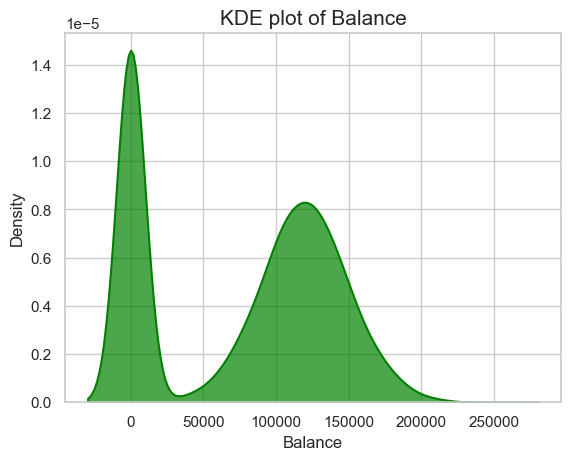

In [14]:
sns.set(style="whitegrid")
sns.kdeplot(data=df["Balance"], fill=True, alpha=0.7, linewidth=1.5, color="green")

plt.title("KDE plot of Balance", fontsize=15)


The bimodal distribution suggest the presence of two distinct groups of customers with different account balances. 
one group have 0 balance in account and other group have average balance of 175000 Rs.

In [24]:
#No of Customers having account balance zero
balance_counts = df['Balance'].value_counts()

if 0 in balance_counts.index:
    count_of_zeros = balance_counts[0]
else:
    count_of_zeros = 0

print(count_of_zeros)                                                 

3617


In [27]:
# Filter churned customers with zero balance
churned_zero_balance = df[(df['Churn'] == 1) & (df['Balance'] == 0)]

# Count the number of churned customers with zero balance
count_of_churned_zero_balance = churned_zero_balance.shape[0]

print(count_of_churned_zero_balance)

500


Out of total 3617  zero balance customers 500 customers   left the bank, it also give weak corelation bet balance and churn  

Text(0.5, 1.0, 'Box Plot of Balance')

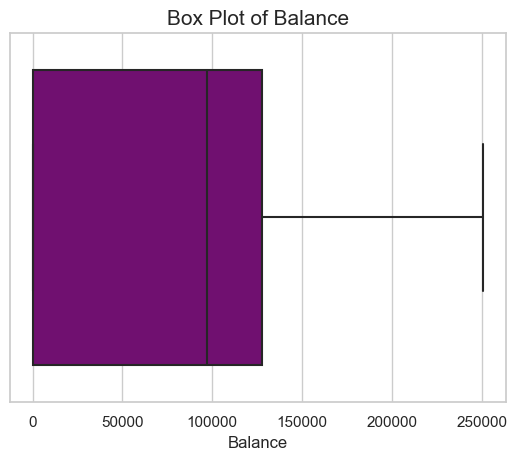

In [16]:
sns.boxplot(x=df["Balance"], color="purple")
plt.title("Box Plot of Balance", fontsize=15)


Text(0.5, 1.0, 'Box Plot of Age')

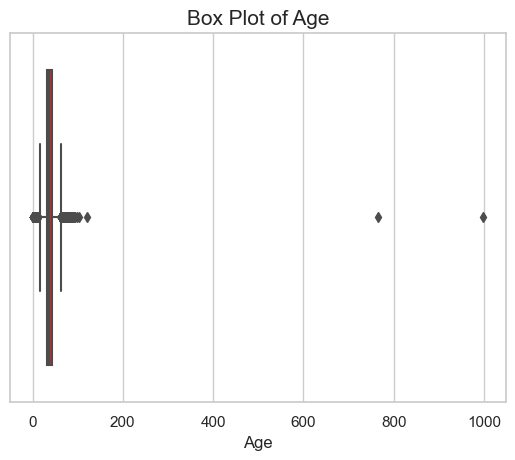

In [17]:
sns.boxplot(x=df["Age"], color="red")
plt.title("Box Plot of Age", fontsize=15)


Text(0.5, 1.0, 'Box Plot of Estimated Salary')

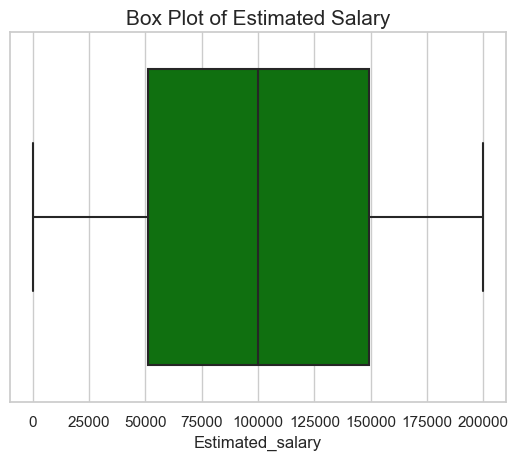

In [18]:
sns.boxplot(x=df["Estimated_salary"], color="green")
plt.title("Box Plot of Estimated Salary", fontsize=15)


Text(0.5, 1.0, 'Box Plot of Credit Score')

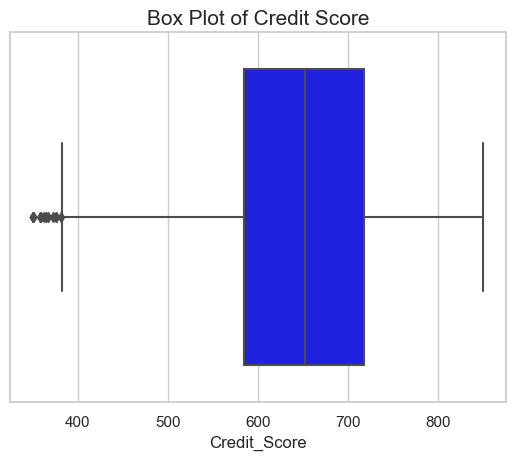

In [19]:
sns.boxplot(x=df["Credit_Score"], color="blue")
plt.title("Box Plot of Credit Score", fontsize=15)


Text(0.5, 1.0, 'KDE of Tenure')

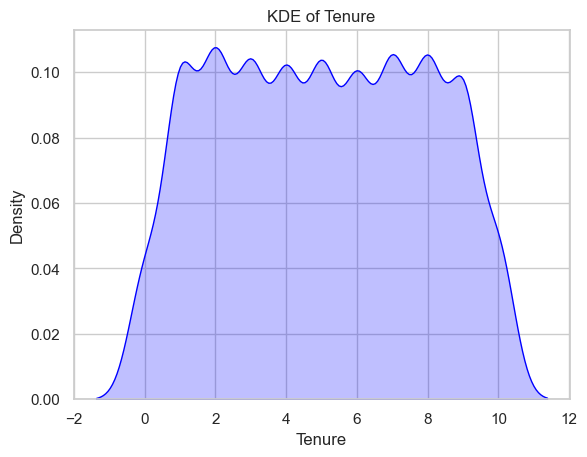

In [20]:
sns.kdeplot(df["Tenure"],fill=True,color='blue')
plt.title("KDE of Tenure")

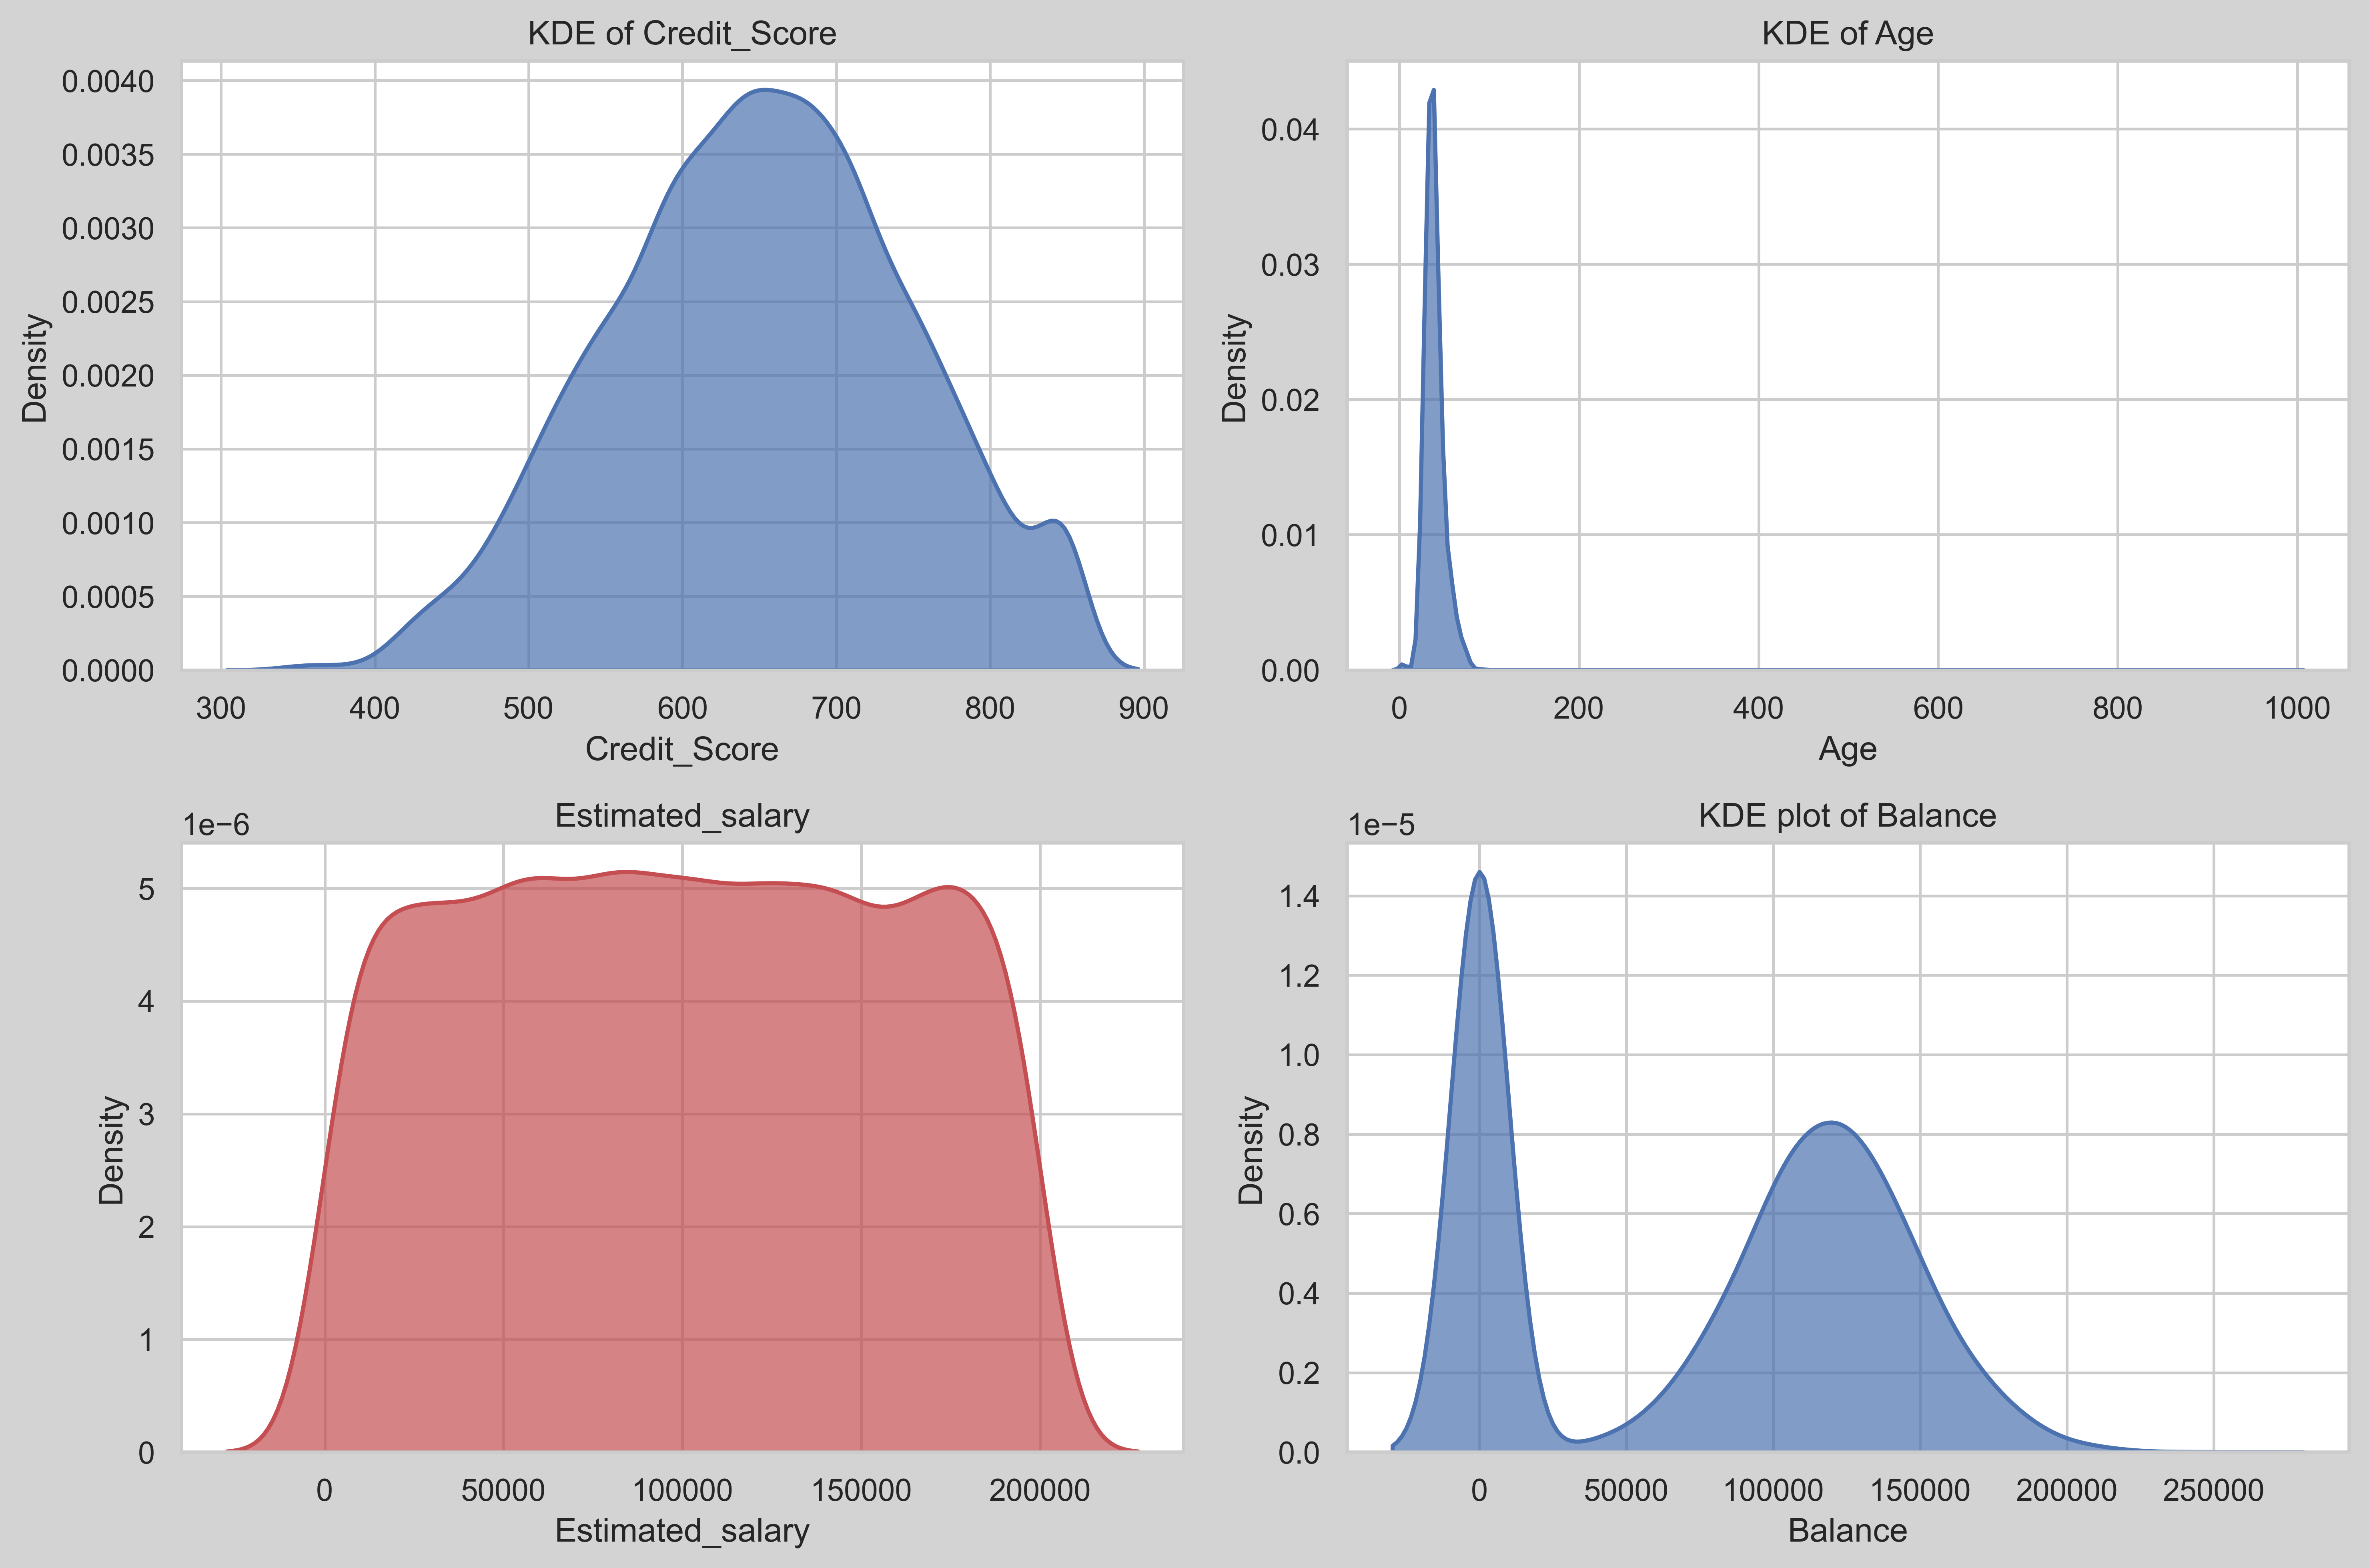

In [21]:
fig, axes = plt.subplots(2, 2,facecolor='lightgray',dpi=500,num=1,figsize=(12, 8))

# Plot your data on each subplot
sns.kdeplot(data=df["Credit_Score"], fill=True, common_norm=False, alpha=0.7, linewidth=1.5, ax=axes[0, 0])
axes[0, 0].set_title("KDE of Credit_Score")

sns.kdeplot(data=df["Age"], fill=True, common_norm=False, alpha=0.7, linewidth=1.5, ax=axes[0, 1])
axes[0, 1].set_title("KDE of Age")

sns.kdeplot(data=df["Estimated_salary"], fill=True, common_norm=False, alpha=0.7, linewidth=1.5, color="r", ax=axes[1, 0])
axes[1, 0].set_title("Estimated_salary")

sns.kdeplot(data=df["Balance"], fill=True, alpha=0.7, linewidth=1.5, cmap="winter", ax=axes[1, 1])
axes[1, 1].set_title("KDE plot of Balance")

# Adjust spacing between subplots
plt.tight_layout()

# Show the subplots
plt.show()


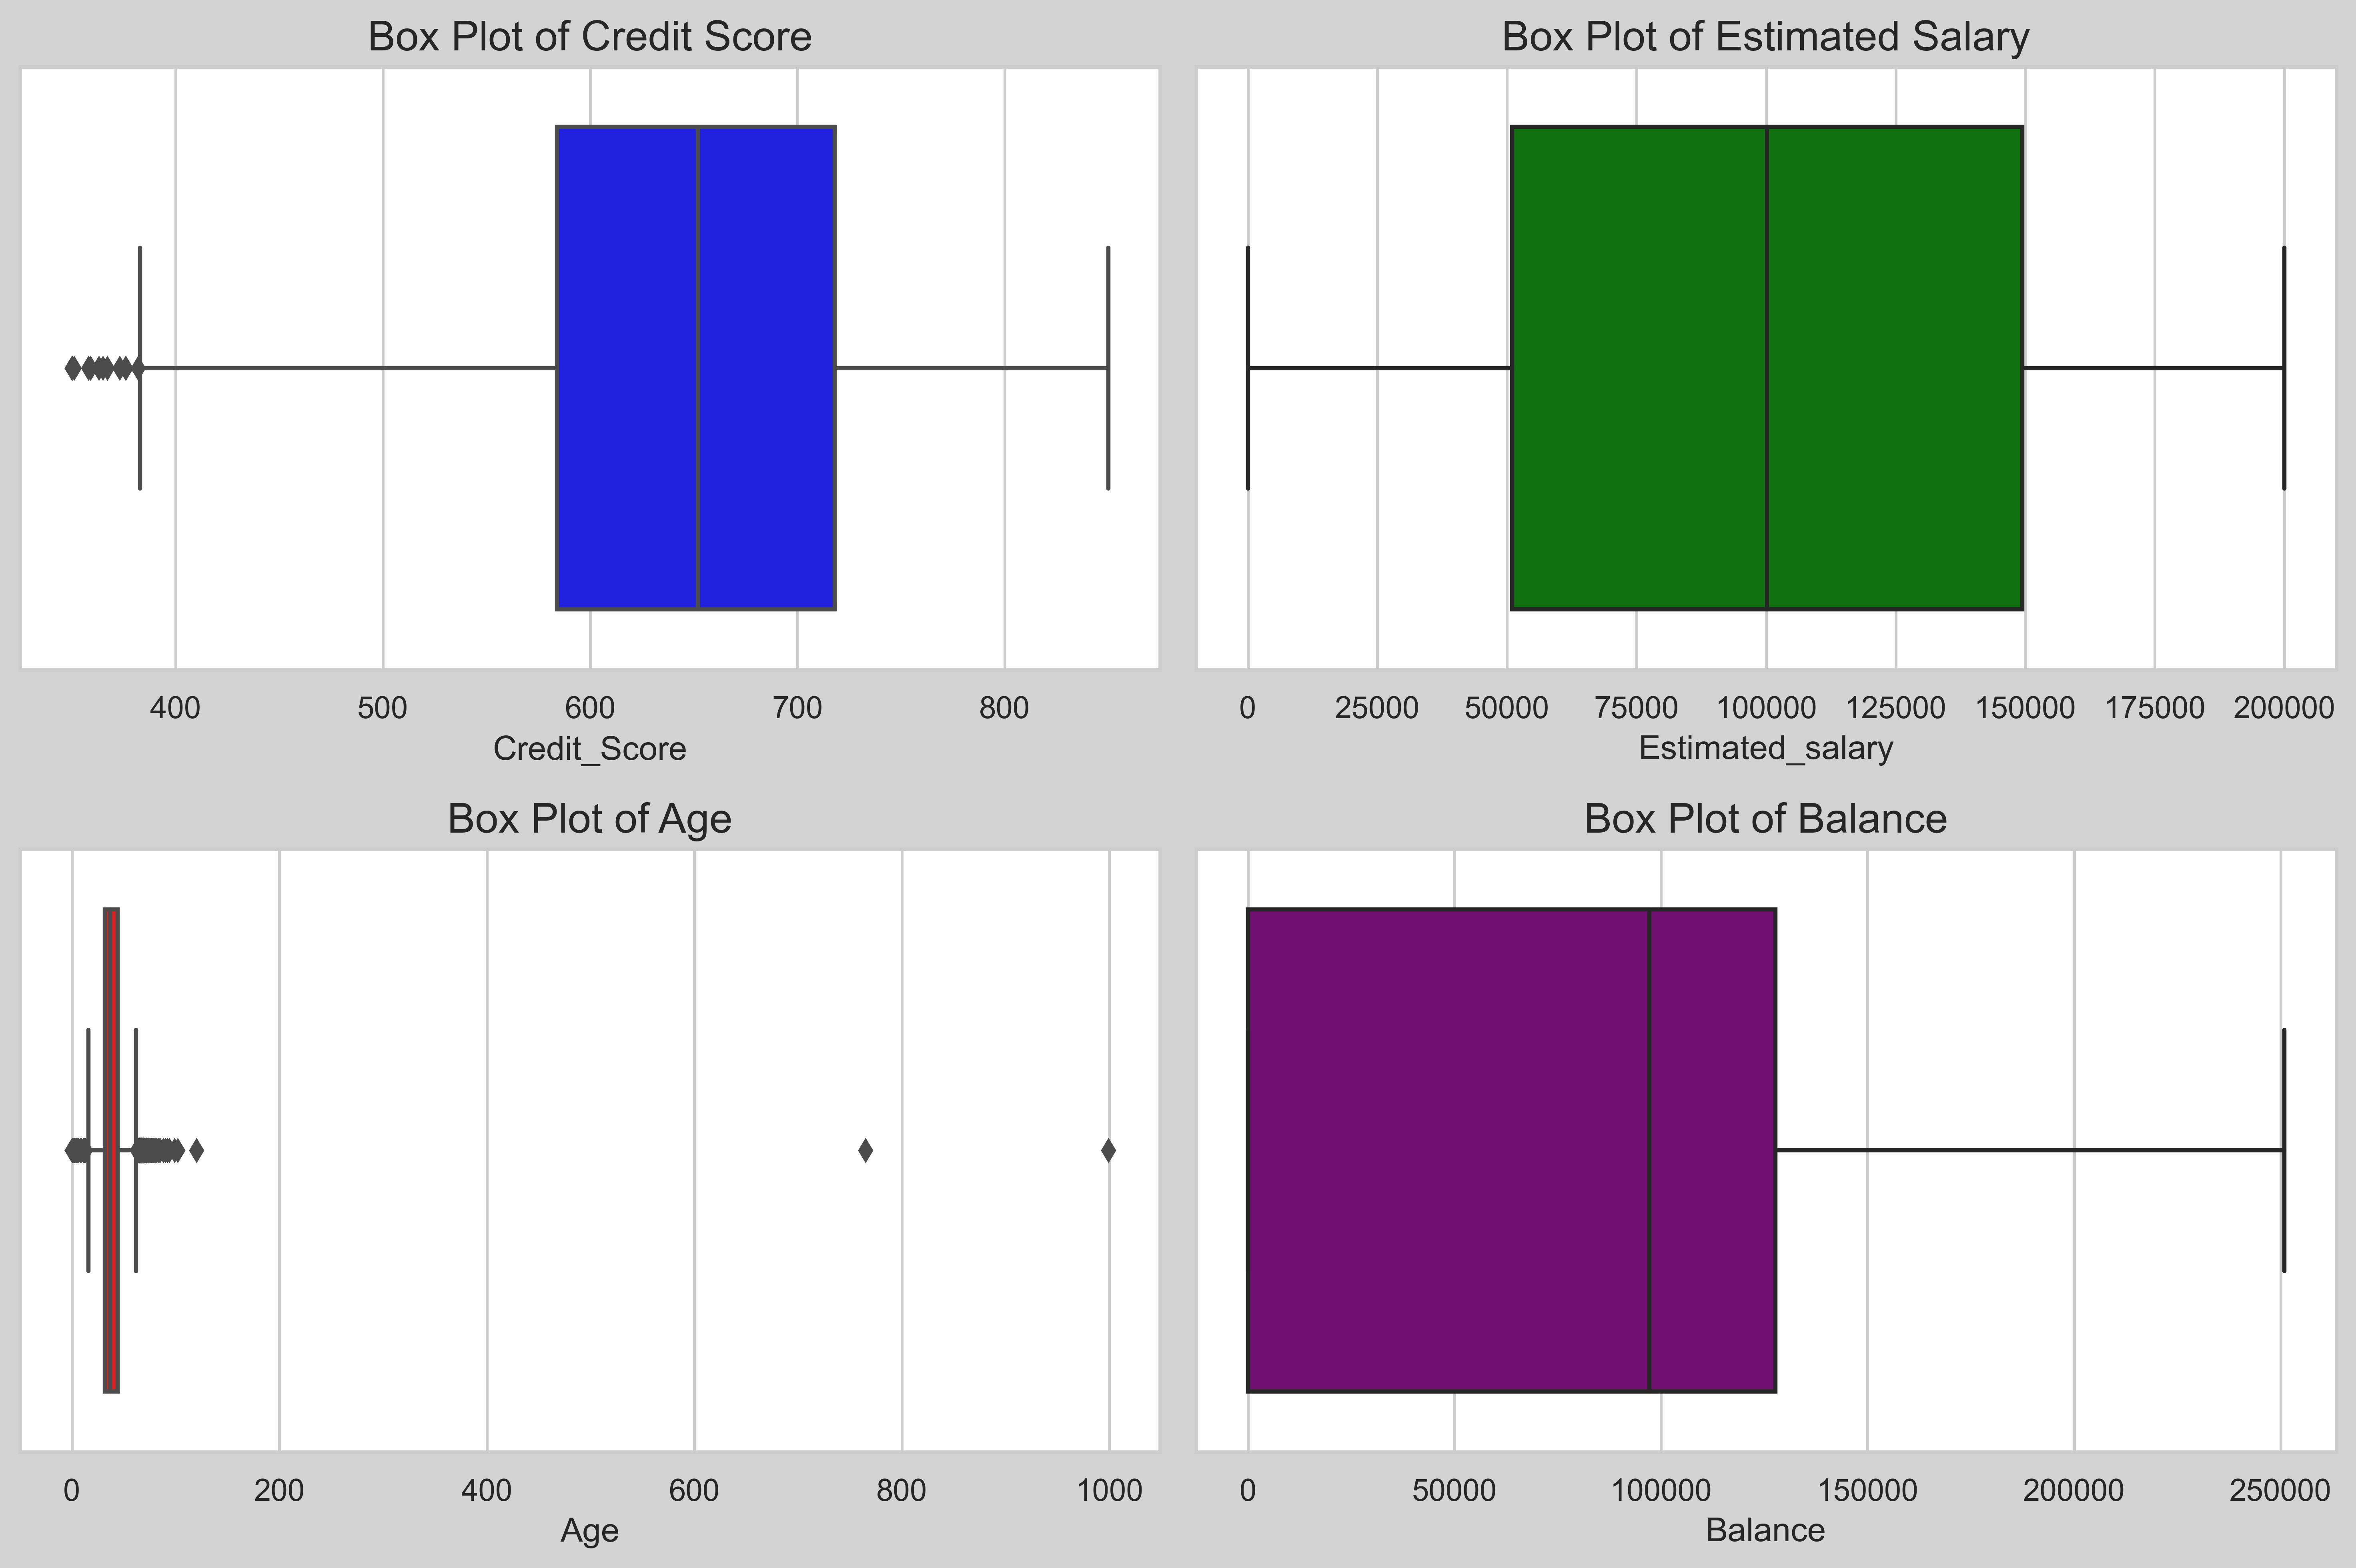

In [22]:
fig, axes = plt.subplots(2, 2,facecolor='lightgray',dpi=500,num=1,figsize=(12, 8))

sns.boxplot(x=df["Credit_Score"], color="blue",ax=axes[0,0])
axes[0,0].set_title("Box Plot of Credit Score", fontsize=15)


sns.boxplot(x=df["Estimated_salary"], color="green",ax=axes[0,1])
axes[0,1].set_title("Box Plot of Estimated Salary", fontsize=15)


sns.boxplot(x=df["Age"], color="red",ax=axes[1,0])
axes[1,0].set_title("Box Plot of Age", fontsize=15)


sns.boxplot(x=df["Balance"], color="purple",ax=axes[1,1])
axes[1,1].set_title("Box Plot of Balance", fontsize=15)
plt.tight_layout()
plt.show()





# Finding The missing value count of each column 

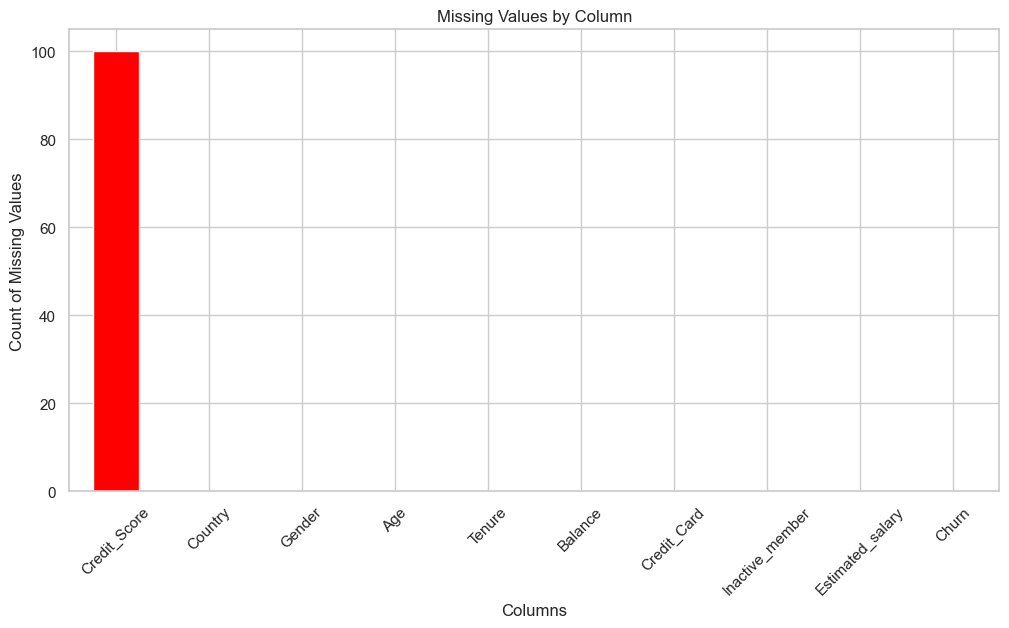

In [28]:
missing_data = df.isnull().sum()

# Create a bar plot
plt.figure(figsize=(12, 6))
missing_data.plot(kind='bar', color='red')
plt.title('Missing Values by Column')
plt.xlabel('Columns')
plt.ylabel('Count of Missing Values')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.show()


 only  Credit Card  column have  100 missing values.  we can drop those rows as 100 rows  in 10000 rows can be dropped. 

In [63]:
df.dropna(inplace=True)

# dealing with  outliers 

##The Interquartile Range (IQR)

In [30]:
df.columns

Index(['Credit_Score', 'Country', 'Gender', 'Age', 'Tenure', 'Balance',
       'Credit_Card', 'Inactive_member', 'Estimated_salary', 'Churn'],
      dtype='object')

In [31]:
Q1=df["Age"].quantile(0.20)
Q3=df["Age"].quantile(0.75)
IQR= Q3-Q1
lower_tail=Q1-1.5*IQR
upper_tail=Q3+1.5*IQR

In [32]:
outliers = df[(df['Age'] < lower_tail) | (df['Age'] > upper_tail)]

In [33]:
outliers.describe()

,Credit_Score,Age,Tenure,Balance,Estimated_salary,Churn
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,664.894389,66.270627,5.042904,73381.336832,99486.064422,0.151815
std,99.794136,46.266712,2.956888,63247.951874,57502.361336,0.359435
min,407.000000,0.000000,0.000000,0.000000,653.580000,0.000000
25%,601.500000,67.000000,2.500000,0.000000,51387.190000,0.000000
50%,662.000000,70.000000,5.000000,94203.800000,99792.820000,0.000000
75%,732.500000,74.000000,8.000000,126359.015000,147445.660000,0.000000
max,850.000000,765.000000,10.000000,190479.480000,199493.380000,1.000000


There are 303 rows in "Age" column whoes values are outliers,  also min, max value for age are 0 and 999 repes. which is wrong, so we will 

Imputing Outliers in Age column by mean of age column 

In [34]:
# Calculating  the mean of the "Age" column
age_mean = df['Age'].mean()
age_mean

38.85757575757576

In [35]:
# Replacing the outliers with the mean of Age column
df.loc[(df['Age'] < lower_tail) | (df['Age'] > upper_tail), 'Age'] = age_mean

Text(0.5, 1.0, 'Box_Plot of Age col')

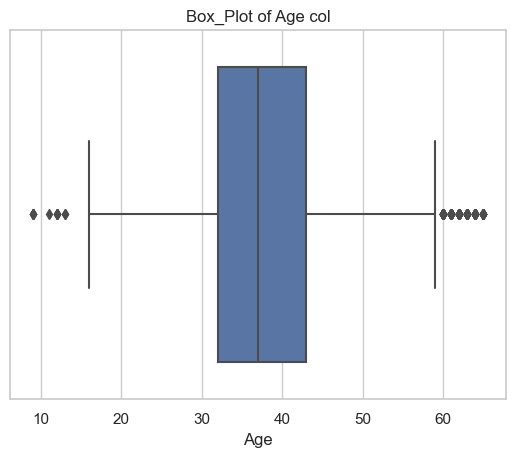

In [36]:
# Rechacking the Distibution of Age col data by Boxplot 
sns.boxplot(x=df['Age'])
plt.title('Box_Plot of Age col')

# Feature Engineering 

The process of creating new features or transforming existing ones to improve the performance of machine learning models. Involves selecting, modifying, or creating features from the raw data to make it more suitable for the modeling process.

In [32]:
df.dtypes

Customer_ID           int64
Credit_Score        float64
Country              object
Gender               object
Age                 float64
Tenure                int64
Balance             float64
Credit_Card          object
Active_Member        object
Estimated_salary    float64
Churn                 int64
dtype: object

converting the object (categorical) data to numerical form.

In [47]:
df['Country'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Country, dtype: int64

- We have a column called "Country" in our dataset, which contains the names of three countries. Instead of using one-hot encoding, we will use the replace method to replace the country names with numerical labels (0, 1, and 2). By doing this, we intentionally avoid increasing the dimensionality of our dataset.n/
- By using this approach, we can encode the country information without expanding the dimensionality of the dataset, which can be advantageous in certain scenarios.

In [48]:
df.columns

Index(['Customer_ID', 'Credit_Score', 'Country', 'Gender', 'Age', 'Tenure',
       'Balance', 'Credit_Card', 'Active_Member', 'Estimated_salary', 'Churn'],
      dtype='object')

In [51]:
country_mapping = {'France': 0, 'Germany': 1, 'Spain': 2}
# Replace country values with numerical labels
df['Country'].replace(country_mapping, inplace=True)


In [53]:
df.head()

,Customer_ID,Credit_Score,Country,Gender,Age,Tenure,Balance,Credit_Card,Active_Member,Estimated_salary,Churn
0,15634602,619.0,0,Female,42,2,0.00,Yes,Yes,101348.88,1
1,15647311,608.0,1,Female,41,1,83807.86,No,Yes,112542.58,0
2,15619304,502.0,0,Female,42,8,159660.80,Yes,No,113931.57,1
3,15701354,699.0,0,Female,102,1,0.00,No,No,93826.63,0
4,15737888,850.0,1,Female,43,2,125510.82,Yes,Yes,79084.10,0


Now converting "Credit card" and "Active Member" column by using replace method as both have only "Yes" or "No" values 
and for "Gender" column 0="Female and 1="Male"

In [141]:
df['Credit_Card'] = df['Credit_Card'].replace({'Yes': 1, 'No': 0})

df['Active_Member'] = df['Active_Member'].replace({'Yes': 1, 'No': 0})

df['Gender']=df['Gender'].replace({'Female':0,"Male":1})

df.head(4)

,Credit_Score,Country,Gender,Age,Tenure,Balance,Credit_Card,Active_Member,Estimated_salary,Churn
0,619.0,0,0,42,2,0.00,1,1,101348.88,1
1,608.0,1,0,41,1,83807.86,0,1,112542.58,0
2,502.0,0,0,42,8,159660.80,1,0,113931.57,1
3,699.0,0,0,102,1,0.00,0,0,93826.63,0


In [55]:
#All colums are now in numerical format 
df.dtypes

Customer_ID           int64
Credit_Score        float64
Country               int64
Gender                int64
Age                   int64
Tenure                int64
Balance             float64
Credit_Card           int64
Active_Member         int64
Estimated_salary    float64
Churn                 int64
dtype: object

Feature selection 
 choose the most relevant features or variables for building a predictive model.
 here we are using filter method( variance, correaltion) along with graphical representation

In [142]:
df.corr()

,Credit_Score,Country,Gender,Age,Tenure,Balance,Credit_Card,Active_Member,Estimated_salary,Churn
Credit_Score,1.000000,0.008705,-0.003521,-0.013893,0.000035,0.006875,-0.006994,-0.014944,-0.000204,-0.027058
Country,0.008705,1.000000,-0.016639,0.040803,0.003223,0.348035,0.003299,0.026424,0.005404,0.152789
Gender,-0.003521,-0.016639,1.000000,-0.021092,0.015665,0.012620,0.005425,0.005878,-0.006101,-0.105938
Age,-0.013893,0.040803,-0.021092,1.000000,-0.002122,0.026178,-0.009396,0.062556,-0.000566,0.224418
Tenure,0.000035,0.003223,0.015665,-0.002122,1.000000,-0.011250,0.022829,-0.012022,0.007518,-0.013676
Balance,0.006875,0.348035,0.012620,0.026178,-0.011250,1.000000,-0.014279,0.360258,0.011909,0.118113
Credit_Card,-0.006994,0.003299,0.005425,-0.009396,0.022829,-0.014279,1.000000,-0.002242,-0.009123,-0.007876
Active_Member,-0.014944,0.026424,0.005878,0.062556,-0.012022,0.360258,-0.002242,1.000000,-0.010366,0.184982
Estimated_salary,-0.000204,0.005404,-0.006101,-0.000566,0.007518,0.011909,-0.009123,-0.010366,1.000000,0.010943
Churn,-0.027058,0.152789,-0.105938,0.224418,-0.013676,0.118113,-0.007876,0.184982,0.010943,1.000000


Text(0.5, 1.0, 'Correlation Heatmap')

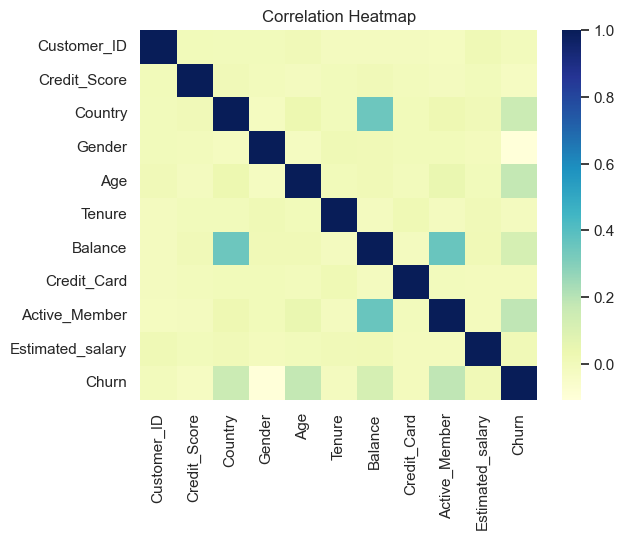

In [57]:
sns.heatmap(df.corr(),cmap="YlGnBu")
plt.title("Correlation Heatmap")

In [40]:
# sns.pairplot(df)

# Checking for multicolinarity 
 ensure that the independent variables (features) in data  are not highly correlated with each other. Multicollinearity can lead to unstable coefficient estimates and make it difficult to interpret the model.

#By Using VIF 
measures how much the variance of the estimated coefficients is increased due to multicollinearity. 

In [94]:
Independant_features = ['Credit_Score', 'Age', 'Tenure', 'Balance', 'Estimated_salary']
df_of_Independant_features = df[Independant_features]

# Initialize an empty DataFrame to store the VIF values
vif_df = pd.DataFrame()

# Calculate the VIF for each column
vif_list = [variance_inflation_factor(df_of_Independant_features.values, i) for i in range(df_of_Independant_features.shape[1])]

# Assign the VIF values to the DataFrame
vif_df['Feature'] = Independant_features
vif_df['VIF'] = vif_list

# Print the VIF DataFrame
print(vif_df)


            Feature        VIF
0      Credit_Score  12.639567
1               Age   8.403945
2            Tenure   3.812545
3           Balance   2.458537
4  Estimated_salary   3.845989


# Spillitng data in training and testing for model training 

In [97]:
x=df.drop(columns=["Churn"])
y=df["Churn"]

In [98]:
x

,Credit_Score,Country,Gender,Age,Tenure,Balance,Credit_Card,Active_Member,Estimated_salary
0,619.0,0,0,42,2,0.00,1,1,101348.88
1,608.0,1,0,41,1,83807.86,0,1,112542.58
2,502.0,0,0,42,8,159660.80,1,0,113931.57
3,699.0,0,0,102,1,0.00,0,0,93826.63
4,850.0,1,0,43,2,125510.82,1,1,79084.10
...,...,...,...,...,...,...,...,...,...
9995,771.0,0,1,39,5,0.00,1,0,96270.64
9996,516.0,0,1,35,10,57369.61,1,1,101699.77
9997,709.0,0,0,36,7,0.00,0,1,42085.58
9998,772.0,2,1,1,3,75075.31,1,0,92888.52


# train test split 

In [100]:
x_train, x_test,y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=15,stratify=y)

In [101]:
x_train.head()

,Credit_Score,Country,Gender,Age,Tenure,Balance,Credit_Card,Active_Member,Estimated_salary
6347,637.0,2,1,35,8,147127.81,1,0,84760.70
7204,686.0,1,1,39,10,136258.06,0,1,89199.51
3040,716.0,0,1,38,4,0.00,1,0,189678.70
5265,560.0,0,0,27,5,0.00,1,0,131919.48
74,519.0,0,1,36,9,0.00,0,0,145562.40


In [105]:
y_train.value_counts()

0    6308
1    1612
Name: Churn, dtype: int64

In [106]:
y_test.value_counts()

0    1577
1     403
Name: Churn, dtype: int64

# Model Traning

In [81]:
# Instantiate the Model
log_reg=LogisticRegression()
log_reg

LogisticRegression()

In [107]:
# Training the model on training data
Log_Reg_Model=log_reg.fit(x_train,y_train)

In [83]:
# predicting by using training data
y_pred_train=Log_Reg_Model.predict(x_train) 
y_pred_train

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

# Model Evaluation

In [114]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Calculate accuracy
accuracy = accuracy_score(y_train, y_pred_train)
print(f"Accuracy: {accuracy}")
print("-" * 60)

# Create a confusion matrix
conf_mat = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix:\n", conf_mat)
print("-" * 60)

# Generate a classification report
clf_rep = classification_report(y_train, y_pred_train)
print("Classification Report:\n", clf_rep)


Accuracy: 0.7916666666666666
------------------------------------------------------------
Confusion Matrix:
 [[6212   96]
 [1554   58]]
------------------------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.98      0.88      6308
           1       0.38      0.04      0.07      1612

    accuracy                           0.79      7920
   macro avg       0.59      0.51      0.47      7920
weighted avg       0.71      0.79      0.72      7920



In our project focused on predicting customer churn in the banking sector, the emphasis lies in identifying and retaining as many potentially at-risk customers as possible. Given that predicting customers who might churn (the positive class) is of higher significance than identifying those who won't, we have made the strategic decision to lower the classification threshold to 0.2. By doing so, we are effectively instructing the model to be more inclusive in labeling customers as at-risk, even if this results in a higher number of false positives. This adjustment ensures that our model maximizes its recall for the positive class, allowing us to capture more churn-prone customers early on. This proactive approach aligns with our project's primary objective of customer retention and can help in implementing targeted strategies to prevent churn.

In [134]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Define a function to adjust the threshold
def adjust_threshold(y_prob, threshold):
    return [1 if prob >= threshold else 0 for prob in y_prob]

# Get probability predictions from your model
y_prob = Log_Reg_Model.predict_proba(x_train)[:, 1]

# Adjust the threshold (e.g., 0.3)
new_threshold = 0.2
y_pred_adjusted = adjust_threshold(y_prob, new_threshold)

# Calculate accuracy
accuracy = accuracy_score(y_train, y_pred_adjusted)
print(f"Accuracy with adjusted threshold: {accuracy}")
print("-" * 60)

# Create a confusion matrix
conf_mat = confusion_matrix(y_train, y_pred_adjusted)
print("Confusion Matrix with adjusted threshold:\n", conf_mat)
print("-" * 60)

# Generate a classification report
clf_rep = classification_report(y_train, y_pred_adjusted)
print("Classification Report with adjusted threshold:\n", clf_rep)


Accuracy with adjusted threshold: 0.6005050505050505
------------------------------------------------------------
Confusion Matrix with adjusted threshold:
 [[3711 2597]
 [ 567 1045]]
------------------------------------------------------------
Classification Report with adjusted threshold:
               precision    recall  f1-score   support

           0       0.87      0.59      0.70      6308
           1       0.29      0.65      0.40      1612

    accuracy                           0.60      7920
   macro avg       0.58      0.62      0.55      7920
weighted avg       0.75      0.60      0.64      7920

